In [41]:
#import libraries
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import sklearn
from sklearn.model_selection import train_test_split , cross_val_score
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix ,  plot_roc_curve , classification_report , accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import seaborn

# Read and Clean our Data

In [2]:
#read our data
data =  pd.read_csv("../input/spam-or-not-spam-dataset/spam_or_not_spam.csv")

In [3]:
#head of the data
data.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [4]:
#describe our data
data.describe()

,label
count,3000.000000
mean,0.166667
std,0.372740
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [5]:
#remove NaN value
data.dropna(inplace =  True)

In [6]:
#head of the data
data.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


# Feature Engineering

In [7]:
#labels and mail
X =  data.iloc[:,0].values
y = data.iloc[:,-1].values

In [8]:
# return each mail to its original
nltk.download('stopwords')
corpus =[]
for i in range(len(X)):
    stemmer = PorterStemmer()
    X[i] = X[i].lower()
    X[i] = X[i].split()
    email =  [stemmer.stem(J) for J in X[i] ]
    email = ' '.join(email)
    corpus.append(email)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
#convert to tokens array
v = CountVectorizer()
X = v.fit_transform(corpus).toarray()


# Cross  Val Score 

In [10]:
#test_train split
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size = 0.2 , random_state = 42 )

In [11]:
# cross_val_score of svc
svc  =  SVC()
score_1 = cross_val_score(svc,X_train,y_train,cv = 10 )
score_1 

array([0.90416667, 0.94583333, 0.94166667, 0.95      , 0.94583333,
       0.95416667, 0.9375    , 0.94166667, 0.93333333, 0.94979079])

In [12]:
#mean of score_1
score_1.mean()

0.9403957461645748

In [13]:
# cross_val_score of RandomForestClassifier
Random  =  RandomForestClassifier(n_estimators= 120)
score_2 = cross_val_score(Random,X_train,y_train,cv = 10 )
score_2 

array([0.95416667, 0.975     , 0.97916667, 0.9875    , 0.97916667,
       0.975     , 0.97916667, 0.97083333, 0.975     , 0.9832636 ])

In [14]:
#mean of score_2
score_2.mean()

0.975826359832636

In [15]:
# cross_val_score of RandomForestClassifier
Decision  =  DecisionTreeClassifier()
score_3 = cross_val_score(Decision,X_train,y_train,cv = 10 )
score_3

array([0.9625    , 0.95      , 0.95833333, 0.975     , 0.97083333,
       0.95416667, 0.975     , 0.95833333, 0.96666667, 0.9748954 ])

In [18]:
score_3.mean()

0.9645728730822872

In [16]:
# cross_val_score of knn
knn = KNeighborsClassifier()

score_4 = cross_val_score(knn,X_train,y_train,cv = 10 )
score_4

array([0.88333333, 0.9       , 0.9125    , 0.9125    , 0.92916667,
       0.9125    , 0.90833333, 0.9125    , 0.9       , 0.93723849])

In [17]:
#mean of score_4
score_4.mean()

0.9108071827057185

# Model Training

In [19]:
Random.fit(X_train,y_train)

RandomForestClassifier(n_estimators=120)

In [20]:
y_pred =  Random.predict(X_test)

In [42]:
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.9816666666666667


In [24]:
#classification report
cc =  classification_report(y_test,y_pred)
print(cc)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       500
           1       0.99      0.90      0.94       100

    accuracy                           0.98       600
   macro avg       0.98      0.95      0.97       600
weighted avg       0.98      0.98      0.98       600



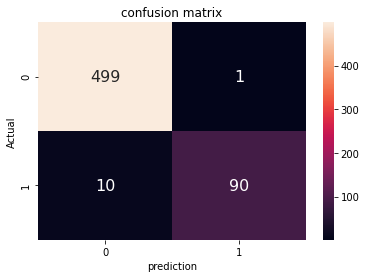

In [31]:
#confusion matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in range(2)],
                  columns = [i for i in range(2)])
seaborn .heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d')
plt.title('confusion matrix')
plt.xlabel('prediction')
plt.ylabel('Actual');

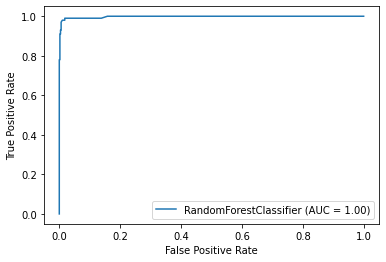

In [44]:
#Roc curve
plot_roc_curve(Random,X_test,y_test)
plt.show()